In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playstation-games-info-2152025/game_details.csv


In [2]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')



In [3]:
df = pd.read_csv("/kaggle/input/playstation-games-info-2152025/game_details.csv")
df

,game_name,highest_price,release_date,genre,publisher,platform,metacritic_score,metacritic_rating_count,metacritic_user_score,metacritic_user_rating_count,playstation_score,playstation_rating_count
0,Grand Theft Auto IV,€24.99,"Feb 15, 2012",Action / Shooter / Racing,Rockstar,PS3,98.0,86.0,8.3,5541.0,4.32,48904.0
1,Red Dead Redemption 2,€59.99,"Oct 26, 2018",Action / Adventure / Unique,Rockstar Games,PS4,97.0,99.0,8.9,31932.0,4.74,379257.0
2,Red Dead Online,€69.99,"Oct 29, 2018",Action / Adventure,Rockstar Games,PS4,97.0,99.0,8.9,31932.0,4.74,379346.0
3,Grand Theft Auto 3,€9.99,"Oct 4, 2012",--,Rockstar Games,PS3,97.0,56.0,8.0,2079.0,4.59,1437.0
4,Grand Theft Auto V,€69.99,"Sep 17, 2013",Action / Adventure,Rockstar Games,PS3,97.0,66.0,8.5,14322.0,4.65,40895.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3521,SENRAN KAGURA Burst Re:Newal,€39.99,"Jan 18, 2019",Action,Marvelous Europe Limited,PS4,65.0,19.0,5.6,65.0,4.69,2485.0
3522,Smash Hit Plunder,€29.99,"Oct 5, 2018",Arcade / Unique / Family,TRIANGULAR PIXELS LTD,PS4,NaN,NaN,NaN,NaN,4.29,7.0
3523,FOX n FORESTS,€19.99,"May 17, 2018",Action / Role playing games / Adventure,ASTRAGON ENTERTAINMENT GMBH,PS4,NaN,NaN,NaN,NaN,4.22,50.0
3524,DYNASTY WARRIORS 9,€69.99,"Mar 13, 2018",Action,Koei Tecmo Europe Ltd,PS4,NaN,NaN,NaN,NaN,3.49,12177.0


In [4]:
# lets dive in the dataset
print(f"Shape of dataset {df.shape}")
print("==="*30)
print(f"Feature name are {list(df.columns)}")
print("==="*30)
print(f"datatypes of each feature \n {df.dtypes}")
print("==="*30)
print(f"numerical datatypes features are {df.select_dtypes(include = np.number).columns.tolist()}")
print("==="*30)
print(f"object datatypes feature are {df.select_dtypes(include = 'O').columns.tolist()}")
print("==="*30)
print(f"Information of dataset {df.info()}")
print("==="*30)
print(f"describtion of numerical columns \n {df.describe()}")
print("==="*30)
print(f"descrption for non integer columne \n{df.describe(include = 'O')}")
print("==="*30)

Shape of dataset (3526, 12)
Feature name are ['game_name', 'highest_price', 'release_date', 'genre', 'publisher', 'platform', 'metacritic_score', 'metacritic_rating_count', 'metacritic_user_score', 'metacritic_user_rating_count', 'playstation_score', 'playstation_rating_count']
datatypes of each feature 
 game_name                        object
highest_price                    object
release_date                     object
genre                            object
publisher                        object
platform                         object
metacritic_score                float64
metacritic_rating_count         float64
metacritic_user_score           float64
metacritic_user_rating_count    float64
playstation_score                object
playstation_rating_count        float64
dtype: object
numerical datatypes features are ['metacritic_score', 'metacritic_rating_count', 'metacritic_user_score', 'metacritic_user_rating_count', 'playstation_rating_count']
object datatypes feature are ['ga

In [5]:
# lets check the value distribution and null values in the dataset
for col in df.columns:
    print("=="*30)
    print(f"for column {col}")
    print(f"    null values count :{df[col].isna().sum()}, null value percentage {df[col].isna().mean()*100 :.2f}")
    print(f"    unique values count :{df[col].nunique()}")
    

for column game_name
    null values count :0, null value percentage 0.00
    unique values count :3270
for column highest_price
    null values count :111, null value percentage 3.15
    unique values count :62
for column release_date
    null values count :0, null value percentage 0.00
    unique values count :1731
for column genre
    null values count :0, null value percentage 0.00
    unique values count :290
for column publisher
    null values count :55, null value percentage 1.56
    unique values count :767
for column platform
    null values count :0, null value percentage 0.00
    unique values count :15
for column metacritic_score
    null values count :2647, null value percentage 75.07
    unique values count :34
for column metacritic_rating_count
    null values count :2647, null value percentage 75.07
    unique values count :106
for column metacritic_user_score
    null values count :2646, null value percentage 75.04
    unique values count :65
for column metacritic_use

## Dataset Summary

- **Total records:** 3526  
- **Total features:** 12

### Features Overview

| Feature                    | Type    | Non-Null Count | Unique Values | Notes                 |
|----------------------------|---------|----------------|---------------|-----------------------|
| game_name                  | Object  | 3526           | 3270          |                       |
| highest_price              | Object  | 3415           | 62            | 3.15% missing         |
| release_date              | Object  | 3526           | 1731          |                       |
| genre                     | Object  | 3526           | 290           |                       |
| publisher                 | Object  | 3471           | 767           | 1.56% missing         |
| platform                  | Object  | 3526           | 15            |                       |
| metacritic_score          | Float64 | 879            | 34            | 75.07% missing        |
| metacritic_rating_count   | Float64 | 879            | 106           | 75.07% missing        |
| metacritic_user_score     | Float64 | 880            | 65            | 75.04% missing        |
| metacritic_user_rating_count | Float64 | 880         | 420           | 75.04% missing        |
| playstation_score         | Object  | 3526           | 205           |                       |
| playstation_rating_count  | Float64 | 2557           | 1541          | 27.48% missing        |

### Numerical Features Stats (selected)

| Feature                   | Count | Mean     | Std       | Min  | 25%   | 50%   | 75%   | Max     |
|---------------------------|-------|----------|-----------|------|-------|-------|-------|---------|
| metacritic_score          | 879   | 77.47    | 9.00      | 65   | 69    | 76    | 85    | 98      |
| metacritic_user_score     | 880   | 6.65     | 2.40      | 0    | 6.4   | 7.4   | 8.1   | 9.5     |
| playstation_rating_count  | 2557  | 7397.91  | 30801.67  | 1    | 74    | 528   | 3103  | 854788  |

### Notes
- High missing values in Metacritic scores and user ratings (~75% missing).
- publisher and highest_price have small missing percentages (~1.5%-3%).
- Object types typically include textual and categorical data.



In [6]:
# here feature having high misssing values are not infromative for us because they may cause for biased result if we fill there null values 

In [7]:
df

,game_name,highest_price,release_date,genre,publisher,platform,metacritic_score,metacritic_rating_count,metacritic_user_score,metacritic_user_rating_count,playstation_score,playstation_rating_count
0,Grand Theft Auto IV,€24.99,"Feb 15, 2012",Action / Shooter / Racing,Rockstar,PS3,98.0,86.0,8.3,5541.0,4.32,48904.0
1,Red Dead Redemption 2,€59.99,"Oct 26, 2018",Action / Adventure / Unique,Rockstar Games,PS4,97.0,99.0,8.9,31932.0,4.74,379257.0
2,Red Dead Online,€69.99,"Oct 29, 2018",Action / Adventure,Rockstar Games,PS4,97.0,99.0,8.9,31932.0,4.74,379346.0
3,Grand Theft Auto 3,€9.99,"Oct 4, 2012",--,Rockstar Games,PS3,97.0,56.0,8.0,2079.0,4.59,1437.0
4,Grand Theft Auto V,€69.99,"Sep 17, 2013",Action / Adventure,Rockstar Games,PS3,97.0,66.0,8.5,14322.0,4.65,40895.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3521,SENRAN KAGURA Burst Re:Newal,€39.99,"Jan 18, 2019",Action,Marvelous Europe Limited,PS4,65.0,19.0,5.6,65.0,4.69,2485.0
3522,Smash Hit Plunder,€29.99,"Oct 5, 2018",Arcade / Unique / Family,TRIANGULAR PIXELS LTD,PS4,NaN,NaN,NaN,NaN,4.29,7.0
3523,FOX n FORESTS,€19.99,"May 17, 2018",Action / Role playing games / Adventure,ASTRAGON ENTERTAINMENT GMBH,PS4,NaN,NaN,NaN,NaN,4.22,50.0
3524,DYNASTY WARRIORS 9,€69.99,"Mar 13, 2018",Action,Koei Tecmo Europe Ltd,PS4,NaN,NaN,NaN,NaN,3.49,12177.0


In [8]:
# lets drop ["metacritic_score","metacritic_rating_count","metacritic_user_score","metacritic_user_rating_count"]
df.drop(columns =["metacritic_score","metacritic_rating_count","metacritic_user_score","metacritic_user_rating_count","playstation_rating_count"],inplace = True )

In [9]:
df

,game_name,highest_price,release_date,genre,publisher,platform,playstation_score
0,Grand Theft Auto IV,€24.99,"Feb 15, 2012",Action / Shooter / Racing,Rockstar,PS3,4.32
1,Red Dead Redemption 2,€59.99,"Oct 26, 2018",Action / Adventure / Unique,Rockstar Games,PS4,4.74
2,Red Dead Online,€69.99,"Oct 29, 2018",Action / Adventure,Rockstar Games,PS4,4.74
3,Grand Theft Auto 3,€9.99,"Oct 4, 2012",--,Rockstar Games,PS3,4.59
4,Grand Theft Auto V,€69.99,"Sep 17, 2013",Action / Adventure,Rockstar Games,PS3,4.65
...,...,...,...,...,...,...,...
3521,SENRAN KAGURA Burst Re:Newal,€39.99,"Jan 18, 2019",Action,Marvelous Europe Limited,PS4,4.69
3522,Smash Hit Plunder,€29.99,"Oct 5, 2018",Arcade / Unique / Family,TRIANGULAR PIXELS LTD,PS4,4.29
3523,FOX n FORESTS,€19.99,"May 17, 2018",Action / Role playing games / Adventure,ASTRAGON ENTERTAINMENT GMBH,PS4,4.22
3524,DYNASTY WARRIORS 9,€69.99,"Mar 13, 2018",Action,Koei Tecmo Europe Ltd,PS4,3.49


In [10]:
print((df == '--').any())
# lets 
df["playstation_score"].replace("--",np.nan,inplace = True)
df["genre"].replace("--",np.nan,inplace = True)


game_name            False
highest_price        False
release_date         False
genre                 True
publisher            False
platform             False
playstation_score     True
dtype: bool


In [11]:
# lets check again for null values 
df.isna().sum()

game_name              0
highest_price        111
release_date           0
genre                519
publisher             55
platform               0
playstation_score    969
dtype: int64

In [12]:
# Remove the '€' sign and convert column to float
df['highest_price'] = df['highest_price'].str.replace('€', '', regex=False).str.strip()

# Convert to float
df['highest_price'] = pd.to_numeric(df['highest_price'], errors='coerce')

print(df['highest_price'].dtype)

float64


In [13]:
# lets fill the null values
median_price = df['highest_price'].median()
df['highest_price'].fillna(median_price, inplace=True)

df['playstation_score'] = pd.to_numeric(df['playstation_score'], errors='coerce')
median_price = df['playstation_score'].median()
df['playstation_score'].fillna(median_price, inplace=True)

In [14]:
## Replace missing genre placeholders
df['genre'] = df['genre'].replace('--', '')

# Generate dummy columns for each genre
genre_dummies = df['genre'].str.get_dummies(sep=' / ')
print(len(genre_dummies.columns))

# Add dummy columns to dataframe
df = pd.concat([df, genre_dummies], axis=1)

# Add a column with count of genres
df['genre_count'] = genre_dummies.sum(axis=1)


23


In [15]:
def frequency(text):
    # Split each genre string into list of genres
    lists = text.str.split('/')
    # print(genre_lists)
    # Explode the lists into separate rows
    exploded = lists.explode()
    # print(exploded)
    # Remove extra whitespace
    exploded = exploded.str.strip()
    # Count frequency of each genre
    freq = exploded.value_counts()
    # Convert to dictionary
    return freq.to_dict()

In [16]:
data = frequency(df["genre"])

{'Action': 1388, 'Adventure': 1058, 'Role playing games': 507, 'Shooter': 347, 'Puzzle': 269, 'Arcade': 250, 'Strategy': 210, 'Unique': 181, 'Horror': 158, 'Racing': 141, 'Simulation': 139, 'Fighting': 129, 'Casual': 100, 'Sports': 93, 'Family': 88, 'Music': 64, 'rhythm': 64, 'Party': 50, 'Simulator': 12, 'Educational': 4, 'Adult': 3, 'Brain training': 3, 'Fitness': 2, 'Quiz': 1}


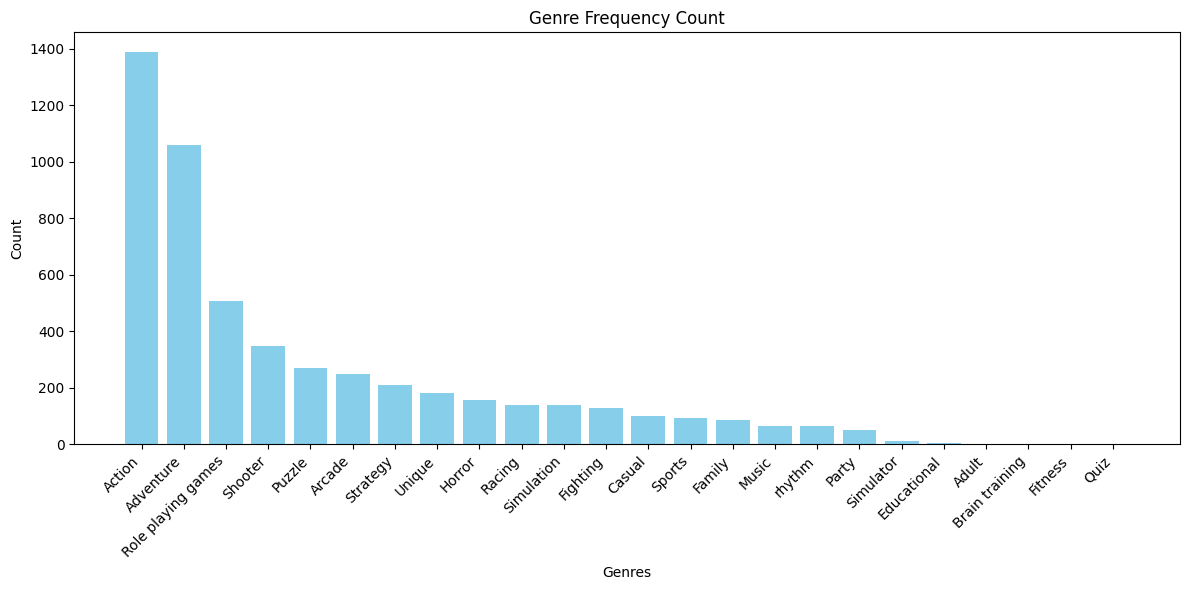

In [17]:
import matplotlib.pyplot as plt 
print(data)
plt.figure(figsize=(12,6))
plt.bar(data.keys(),data.values(), color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Genre Frequency Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


platform
PS4                          1687
PS5 / PS4                     652
PS3                           452
PS5                           407
PS Vita                       161
PS4 / PS Vita                  46
PS Vita / PSP                  40
PS3 / PS Vita / PSP            28
PS4 / PS3 / PS Vita            24
PSP                            11
PS4 / PS3                       8
PS3 / PS Vita                   7
PS3 / PSP                       1
PS5 / PS4 / PS3 / PS Vita       1
PS5 / PS4 / PS Vita             1
Name: count, dtype: int64


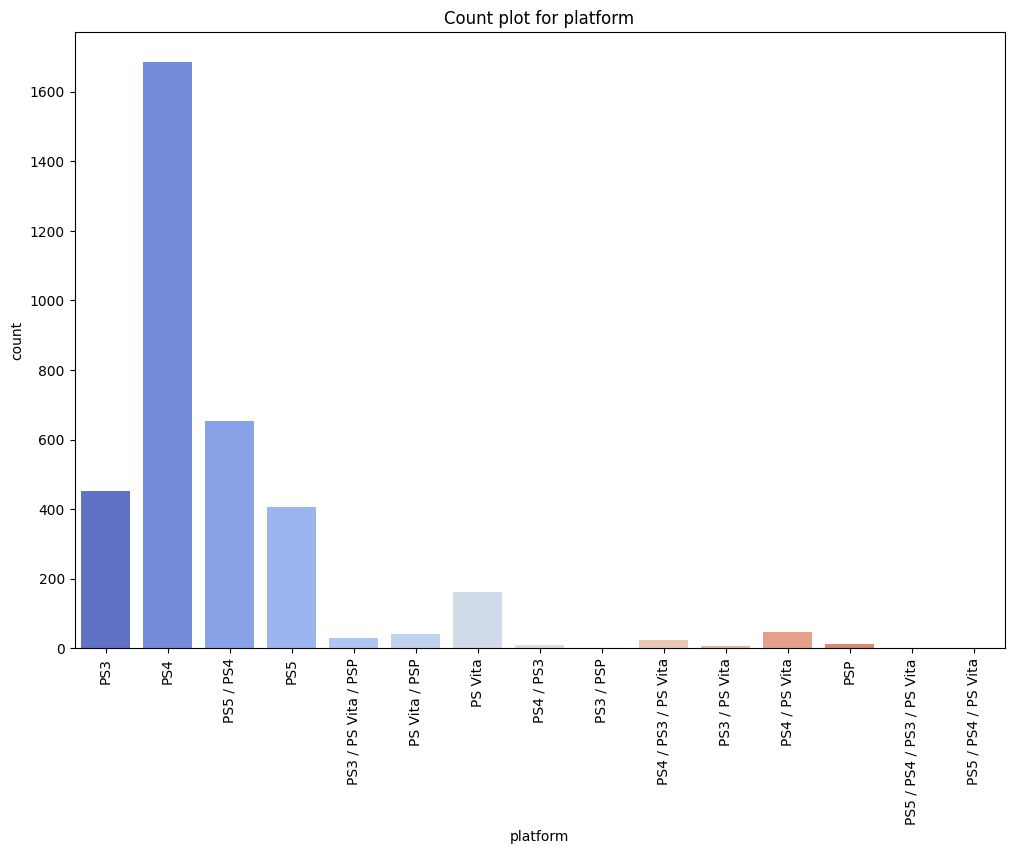

In [18]:
# lets understand platform
import seaborn as sns
print(df["platform"].value_counts())

plt.figure(figsize = (12,8))
sns.countplot(x = "platform",data = df, palette = "coolwarm")
plt.title("Count plot for platform")
plt.xticks(rotation = 90)
plt.show()


{'PS4': 2419, 'PS5': 1061, 'PS3': 521, 'PS Vita': 308, 'PSP': 80}


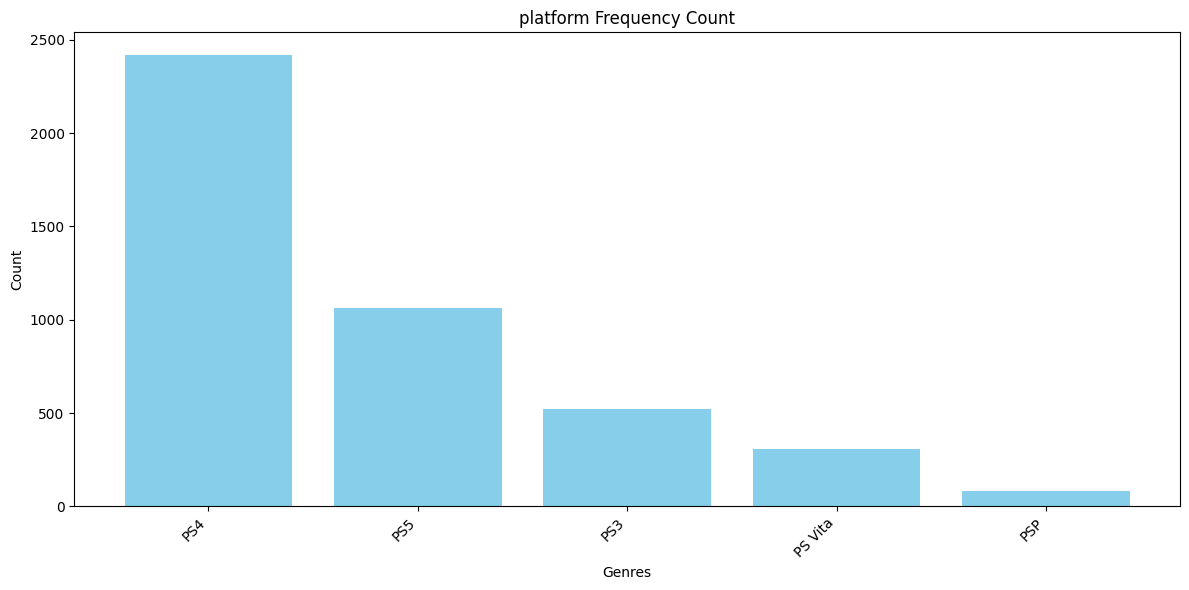

In [19]:
# lets count each platform 
freq_platform = frequency(df["platform"])
print(freq_platform)
plt.figure(figsize=(12,6))
plt.bar(freq_platform.keys(),freq_platform.values(), color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('platform Frequency Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [20]:
# lets do feature eng for platform
platform_dummies = df['platform'].str.get_dummies(sep=' / ')
df = pd.concat([df, platform_dummies], axis=1)
df['platform_count'] = platform_dummies.sum(axis=1)
df.columns.to_list()
print(f"total number of columns = {len(df.columns.to_list())}")




total number of columns = 37


In [21]:
# lets deal with datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')


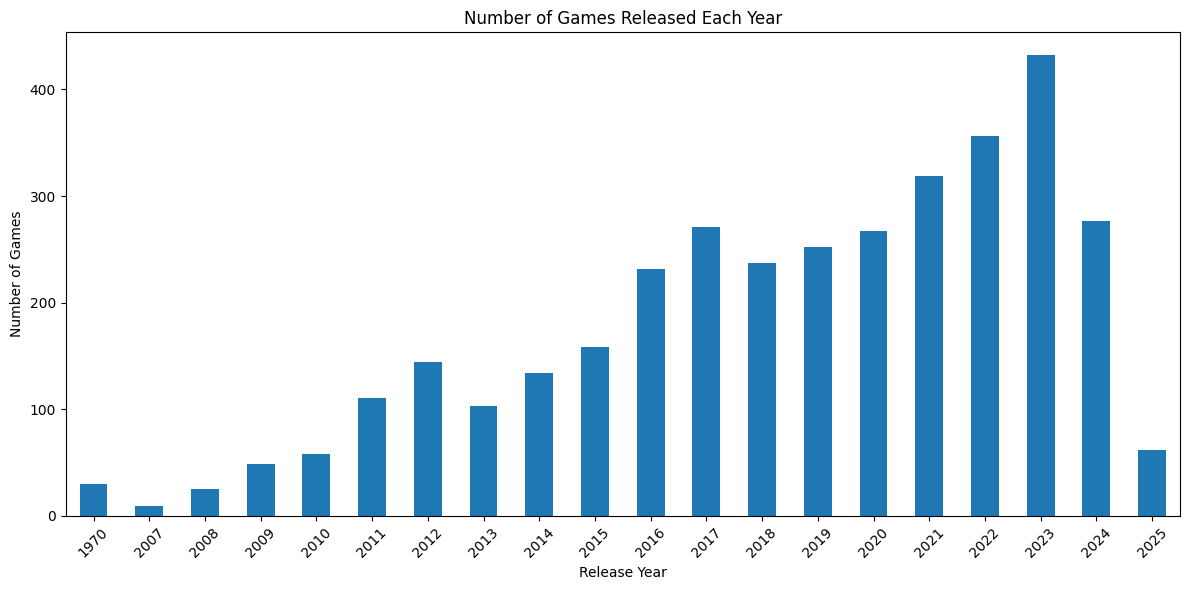

In [22]:
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month
df['release_day_of_week'] = df['release_date'].dt.dayofweek  # Monday=0, Sunday=6

# Count games released per year
release_year_counts = df['release_year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12,6))
release_year_counts.plot(kind='bar')
plt.xlabel('Release Year')
plt.ylabel('Number of Games')
plt.title('Number of Games Released Each Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["game_name"] = le.fit_transform(df["game_name"])
df["publisher"] = le.fit_transform(df["publisher"])


In [24]:
# lets drop our feature which we transformed
df.drop(columns = ["release_date","genre","platform"],inplace = True)

In [25]:
df.isna().sum()

game_name              0
highest_price          0
publisher              0
playstation_score      0
Action                 0
Adult                  0
Adventure              0
Arcade                 0
Brain training         0
Casual                 0
Educational            0
Family                 0
Fighting               0
Fitness                0
Horror                 0
Music/rhythm           0
Party                  0
Puzzle                 0
Quiz                   0
Racing                 0
Role playing games     0
Shooter                0
Simulation             0
Simulator              0
Sports                 0
Strategy               0
Unique                 0
genre_count            0
PS Vita                0
PS3                    0
PS4                    0
PS5                    0
PSP                    0
platform_count         0
release_year           0
release_month          0
release_day_of_week    0
dtype: int64